In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_predict,train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score

%matplotlib inline

In [26]:
df_tr = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
df_te = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

In [27]:
dictionary = {
    0 :'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

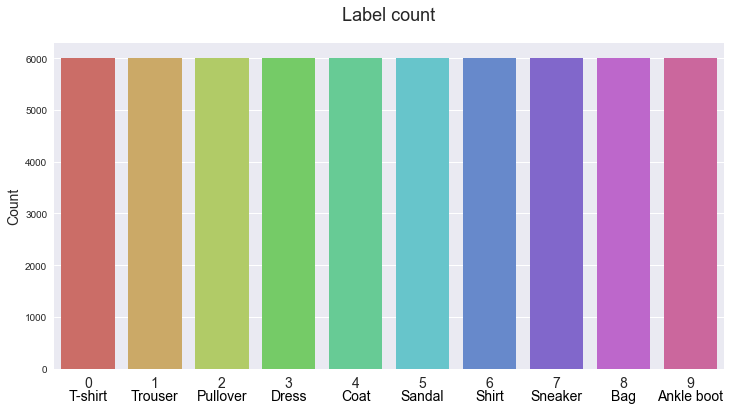

In [28]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df_tr, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

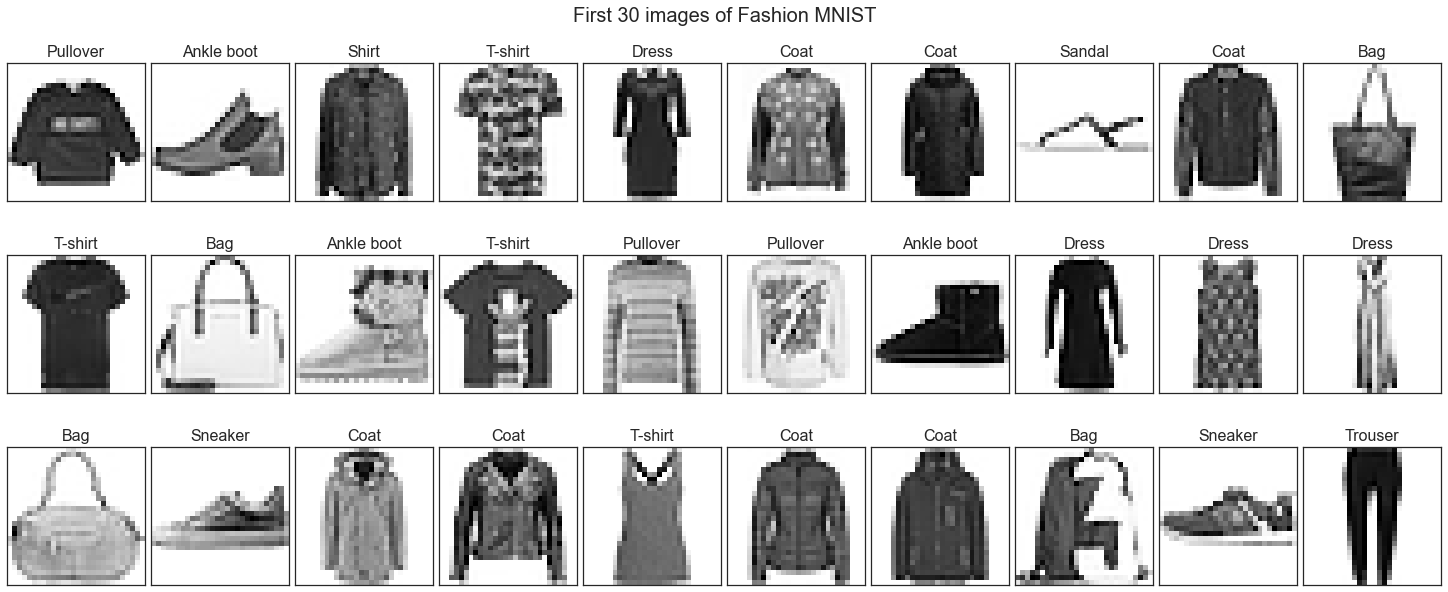

In [29]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df_tr.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df_tr.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [32]:
X = np.array(df_tr.iloc[:,1:])
y = np.array(df_tr.iloc[:,0])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# x_train = np.array(df_tr.iloc[:,1:])
# y_train = np.array(df_tr.iloc[:,0])
# x_test = np.array(df_te.iloc[:,1:])
# y_test = np.array(df_te.iloc[:,0])

In [33]:
print('dimensions x_train:',x_train.shape)
print('dimensions x_test:',x_test.shape)

dimensions x_train: (48000, 784)
dimensions x_test: (12000, 784)


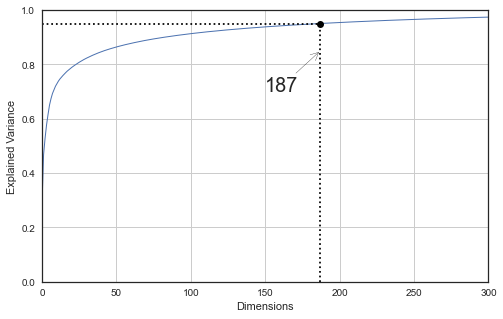

In [34]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(187, 0.85), xytext=(150, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

In [35]:
pipe_rf = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 25, max_depth = 12))
])
pipe_rf.fit(x_train, y_train)
pred=[]
rfpred = pipe_rf.predict(x_test)
pred.append(rfpred)

In [36]:
pipe_lr = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train, y_train)
lrpred = pipe_lr.predict(x_test)
pred.append(lrpred)

In [37]:
pipe_knn = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipe_knn.fit(x_train, y_train)
knnpred = pipe_knn.predict(x_test)
pred.append(knnpred)

In [38]:
pipe_et = Pipeline([
    ('pca',PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train, y_train)
etpred = pipe_et.predict(x_test)
pred.append(etpred)

In [39]:
pipe_svm = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('svm_clf', SVC())
])
pipe_svm.fit(x_train, y_train)
svmpred = pipe_svm.predict(x_test)
pred.append(svmpred)

In [40]:
rows, cols = (5, 10)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1
    

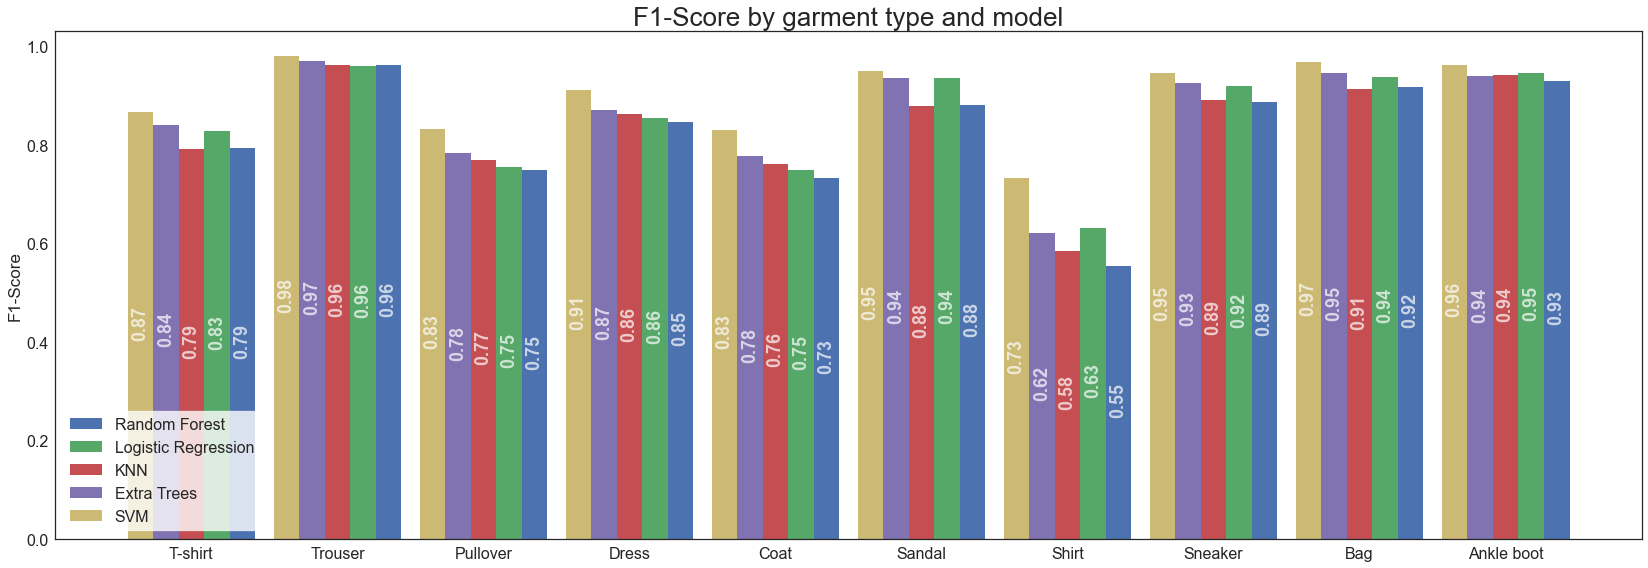

In [41]:
fig, ax = plt.subplots(figsize = (23,8))
width = 0.35;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(5):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score',fontsize=17)
ax.set_title('F1-Score by garment type and model',fontsize=26)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Random Forest','Logistic Regression','KNN','Extra Trees','SVM'],frameon = 2,loc='lower left',
         fontsize =16)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=18,rotation=90,alpha=0.7)
for i in range(5):
    axeplot(rect[i])


fig.tight_layout()

In [42]:
new_pred=[svmpred];n=0.9
for i in range(3):
    pipe_svm_new = Pipeline([
    ('pca', PCA(n_components=n)),
    ('scaler', StandardScaler()),
    ('svm_clf', SVC())])
    pipe_svm_new.fit(x_train, y_train)
    new_pred.append(pipe_svm_new.predict(x_test))
    n-=0.05
j=0.95
for i in range(4):
    print('Accuracy SVC model for', np.argmax(cumsum >= j) + 1,'dimensions :',accuracy_score(y_test, new_pred[i]))
    j-=0.05
    

Accuracy SVC model for 187 dimensions : 0.898
Accuracy SVC model for 84 dimensions : 0.8954166666666666
Accuracy SVC model for 43 dimensions : 0.88775
Accuracy SVC model for 24 dimensions : 0.8775833333333334


In [43]:
pipe_vote = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('voting_clf', VotingClassifier(estimators=[
            ('lr', LogisticRegression(multi_class='ovr',max_iter=1000)),
            ('svm', SVC(probability=True)),
            ('rf', RandomForestClassifier()),
            ('erf', ExtraTreesClassifier())], voting='soft',weights=[1,3,1,1], n_jobs=-1))
])
pipe_vote.fit(x_train, y_train)
votepred = pipe_vote.predict(x_test)

In [44]:
print('Accuracy VOTE model for', np.argmax(cumsum >= 0.95) + 1,'dimensions :',accuracy_score(y_test, votepred))

Accuracy VOTE model for 187 dimensions : 0.89825


In [51]:
df_te.shape

(10000, 785)

In [46]:
real_x_test = np.array(df_te.iloc[:,1:])
real_y_test = np.array(df_te.iloc[:,0])

In [47]:
final_pipe_svm = Pipeline([
    ('pca', PCA(n_components=0.90)),
    ('scaler', StandardScaler()),
    ('svm_clf', SVC())
])
final_pipe_svm.fit(x_train, y_train)
fin=final_pipe_svm.predict(real_x_test)

In [48]:
print('Accuracy final model for', np.argmax(cumsum >= 0.90) + 1,'dimensions :',accuracy_score(real_y_test, fin))

Accuracy final model for 84 dimensions : 0.8989


Text(0.5, 1.05, 'Final model - SVM - Confusion matrix')

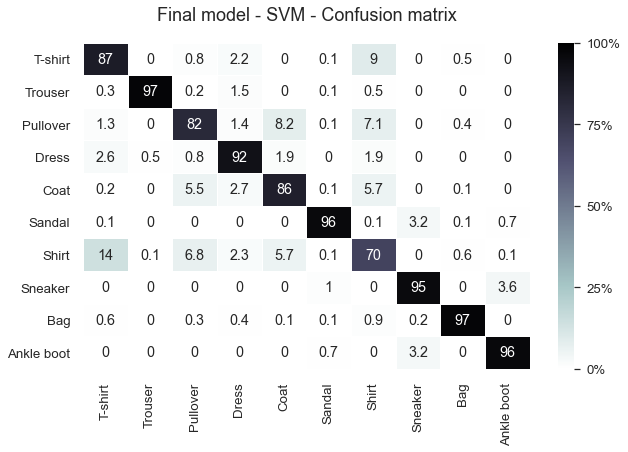

In [50]:
df_cnm=confusion_matrix(real_y_test, fin,normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="bone_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.4)
plt.title('Final model - SVM - Confusion matrix', fontsize = 18, y = 1.05)